<a href="https://colab.research.google.com/github/Vincentmask/CS410-DE/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['[Place, Bib, Name, Gender, City, Chip Time, Gun Time, Team]']
        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

Text(0.5, 0.98, '')

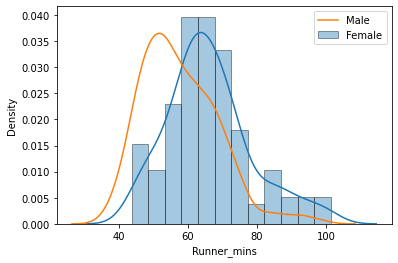

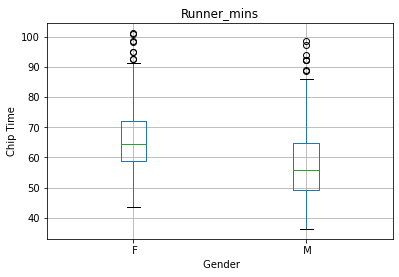

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
 
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)
'''
# Get the title
title = soup.title
print(title)

# Print out the text
text = soup.get_text()
#print(soup.text)

#soup.find_all('a')

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
#print(rows[:10])

for row in rows:
    row_td = row.find_all('td')
print(row_td)

type(row_td)
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)
'''

rows = soup.find_all('tr')
import re

list_rows = []

for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
#print(clean2)
type(clean2)


df = pd.DataFrame(list_rows)
#df.head(10)

df1 = df[0].str.split(',', expand=True)
#df1.head(10)
df1[0] = df1[0].str.strip('[')
df1[0] = df1[0].str.strip('\r')
df1.head(10)

col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

df2 = pd.DataFrame(all_header)
df2.head()

df3 = df2[0].str.split(',', expand=True)
df3.head()

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
#df5.head()

#df5.info()
#df5.shape

df6 = df5.dropna(axis=0, how='any')
#df6.info()
#df6.shape

df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
#df7.head()

df7['Team'] = df7['Team'].str.strip(']')
#df7.head()

time_list = df7[' Chip Time'].tolist()
time_mins = []

for i in time_list:
    count = 0
    h = 0
    for j in range (0, len(i)):
      if(i[j] in (':')):
        count = count +1;
    if(count == 1):
      m,s = i.split(':')
    elif(count == 2):
      h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)
df7['Runner_mins'] = time_mins
df7.head()
df7.describe(include=[np.number])

'''
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])
'''
'''
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()
'''
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")
